In [1]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import gmplot
import gmaps
from IPython.core.display import display, HTML

In [2]:
df = pd.read_pickle('master_location.pkl')
df_crime = pd.read_pickle('crime.pkl')

In [3]:
# df['hour'] = df.date.apply(lambda d: d.hour) 
# df['dayofweek'] = df.date.apply(lambda d: d.dayofweek)
# df['dayofweek_name'] = df.date.apply(lambda d: d.weekday_name)
# df['day'] = df.date.apply(lambda d: d.day)
# df['count'] = 1
# df.to_pickle('master_location.pkl')

In [7]:
df['day'] = df.date.apply(lambda d: d.day)
df.sort_values('date').tail()

,address,area,count,date,day,dayofweek,dayofweek_name,hour,latitude,location,longitude,time,type
231,W HIND DR&KALANIANAOLE; HWY,AINA HAINA,1,2016-12-05 18:07:57,5,0,Monday,18,21.277883,,-157.755145,6:07:57 PM,STALLED/HAZARDOUS VEHICLE
230,E HIND DR&KALANIANAOLE; HWY,AINA HAINA,1,2016-12-05 18:08:45,5,0,Monday,18,21.278681,,-157.749133,6:08:45 PM,STALLED/HAZARDOUS VEHICLE
229,VINEYARD ONTO H1E,HONOLULU,1,2016-12-05 18:08:57,5,0,Monday,18,NaN,VINEYARD ONTO H1E,NaN,6:08:57 PM,MOTOR VEHICLE COLLISION
228,KE ALA MANO ST&MAKUAKANE; ST,KALIHI,1,2016-12-05 18:10:20,5,0,Monday,18,21.339239,,-157.866102,6:10:20 PM,MOTOR VEHICLE COLLISION
227,94105X NALII ST,WAIPAHU,1,2016-12-05 18:19:57,5,0,Monday,18,21.390273,,-158.001856,6:19:57 PM,MOTOR VEHICLE COLLISION


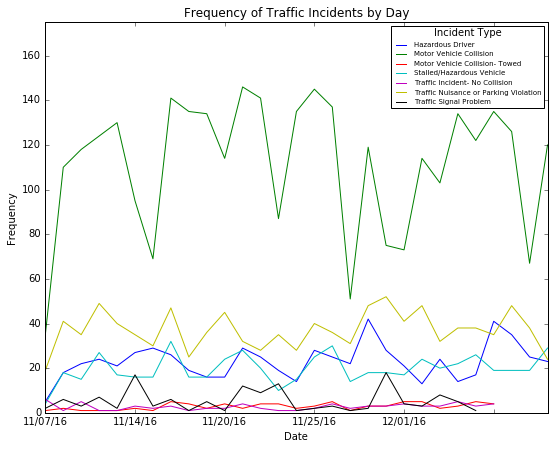

In [4]:
# day_groups = df['exact_date'].value_counts().sort_index().plot(kind='line')
# df['exact_date'] = df['date'].apply(lambda d: d.)
mapping_type = {'HAZARDOUS DRIVER':'Hazardous Driver', 
                'STALLED/HAZARDOUS VEHICLE':'Stalled or Hazardous Vehicle', 
                'TRAFFIC INCIDENT - NO COLLISION':'Traffic Incident with No Collision', 
                'TRAFFIC NUISANCE OR PARKING VIOLATION':'Traffic Nuisance or Parking Violation', 
                'MOTOR VEHICLE COLLISION':'Motor Vehicle Collision', 
                'TRAFFIC SIGNAL PROBLEM':'Traffic Signaling Issue', 
                'MOTOR VEHICLE COLLISION - TOWED':'Motor Vehicle Collision: Towed'}

df['short_date'] = df['date'].apply(lambda x:x.date().strftime('%m/%d/%y'))
groups = df.groupby('type')
names = []
for name, group in groups:
    group.short_date.value_counts().sort_index().plot(kind='line', legend=True, figsize=(9,7))
    names.append(name)
plt.ylim(0, 175)
plt.title('Frequency of Traffic Incidents by Day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(['Hazardous Driver','Motor Vehicle Collision','Motor Vehicle Collision- Towed','Stalled/Hazardous Vehicle','Traffic Incident- No Collision','Traffic Nuisance or Parking Violation','Traffic Signal Problem'], title = 'Incident Type', loc='upper right',prop={'size':7})
plt.savefig('graphs/traffic_frequency.png')


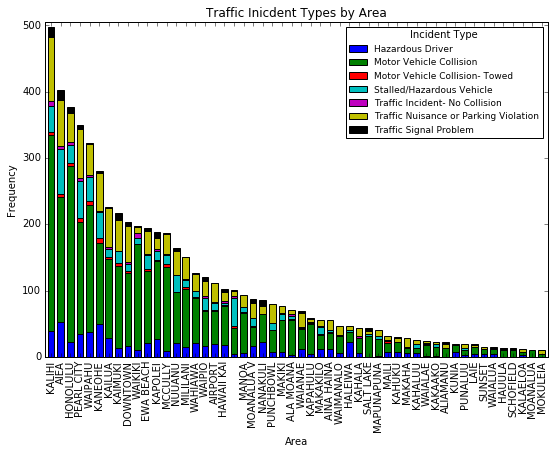

In [5]:
t = ['HAZARDOUS DRIVER', 'STALLED/HAZARDOUS VEHICLE', 'TRAFFIC INCIDENT - NO COLLISION', 'TRAFFIC NUISANCE OR PARKING VIOLATION', 
                'MOTOR VEHICLE COLLISION', 'TRAFFIC SIGNAL PROBLEM', 'MOTOR VEHICLE COLLISION - TOWED']
df_area = df.groupby(['area']).filter(lambda x: len(x) >= 10)
# df_area['count'] = 1
groups = df_area[['area','type','count']].groupby(['area','type']).count().unstack()
groups['total'] = groups.sum(axis=1)
groups = groups.sort_values('total', ascending=False)
groups = groups.drop('total', axis=1)
groups.plot.bar(stacked = True, figsize=(9,6), width=0.7)

groups =  groups.sortlevel(axis=1, level=0)
plt.legend(['Hazardous Driver','Motor Vehicle Collision','Motor Vehicle Collision- Towed','Stalled/Hazardous Vehicle','Traffic Incident- No Collision','Traffic Nuisance or Parking Violation','Traffic Signal Problem'], title = 'Incident Type' ,prop={'size':9})
plt.title('Traffic Inicdent Types by Area')
plt.ylim(0,505)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.savefig('graphs/traffic_area.png')

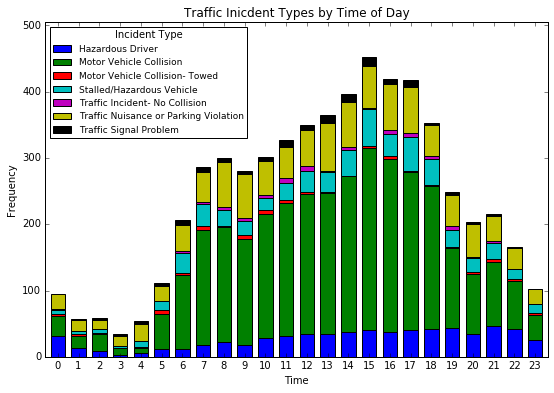

In [6]:
t = ['HAZARDOUS DRIVER', 'STALLED/HAZARDOUS VEHICLE', 'TRAFFIC INCIDENT - NO COLLISION', 'TRAFFIC NUISANCE OR PARKING VIOLATION', 
                'MOTOR VEHICLE COLLISION', 'TRAFFIC SIGNAL PROBLEM', 'MOTOR VEHICLE COLLISION - TOWED']
groups = df_area[['hour','type','count']].groupby(['hour','type']).count().unstack()
groups['total'] = groups.sum(axis=1)
groups = groups.sort_index()
groups = groups.drop('total', axis=1)
groups.plot.bar(stacked = True, figsize=(9,6),rot=0, width=0.7)
groups =  groups.sortlevel(axis=1, level=0)
plt.legend(['Hazardous Driver','Motor Vehicle Collision','Motor Vehicle Collision- Towed','Stalled/Hazardous Vehicle','Traffic Incident- No Collision','Traffic Nuisance or Parking Violation','Traffic Signal Problem'], title = 'Incident Type', loc='upper left',prop={'size':9})
plt.title('Traffic Inicdent Types by Time of Day')
plt.ylim(0,505)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.savefig('graphs/traffic_time.png')

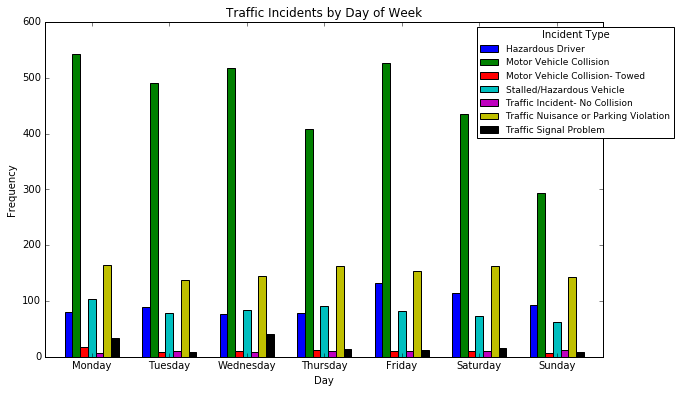

In [7]:
t = ['HAZARDOUS DRIVER', 'STALLED/HAZARDOUS VEHICLE', 'TRAFFIC INCIDENT - NO COLLISION', 'TRAFFIC NUISANCE OR PARKING VIOLATION', 
                'MOTOR VEHICLE COLLISION', 'TRAFFIC SIGNAL PROBLEM', 'MOTOR VEHICLE COLLISION - TOWED']
groups = df_area[['dayofweek','type','count']].groupby(['dayofweek','type']).count().unstack()
groups['total'] = groups.sum(axis=1)
# groups = groups.sort_index()
groups = groups.drop('total', axis=1)
ax = groups.plot.bar(figsize=(10,6),rot=0, width=0.7)
groups =  groups.sortlevel(axis=1, level=0)
plt.legend(['Hazardous Driver','Motor Vehicle Collision','Motor Vehicle Collision- Towed','Stalled/Hazardous Vehicle','Traffic Incident- No Collision','Traffic Nuisance or Parking Violation','Traffic Signal Problem'],bbox_to_anchor=(0.95, 1), title = 'Incident Type', loc='upper center',prop={'size':9})
plt.title('Traffic Incidents by Day of Week')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.savefig('graphs/traffic_day.png')

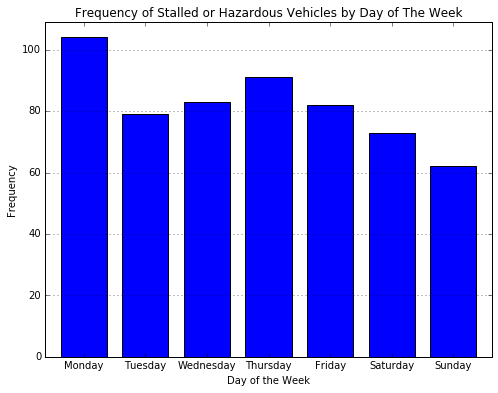

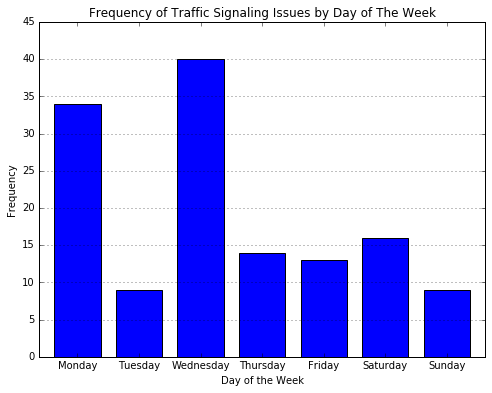

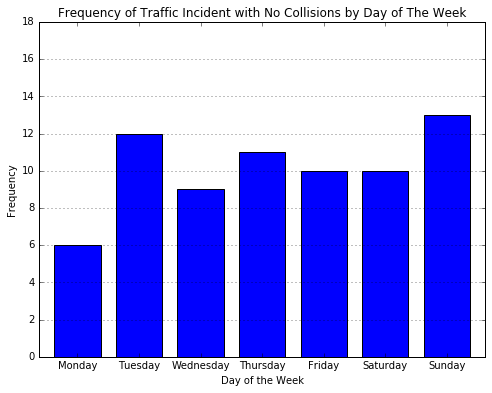

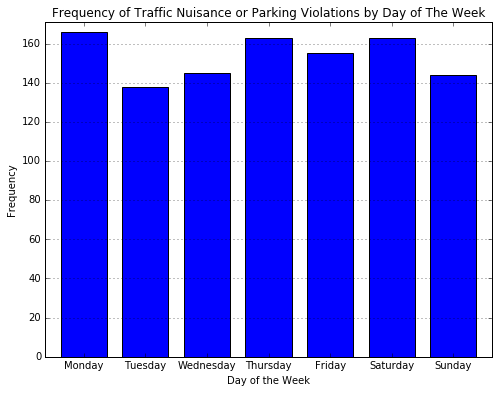

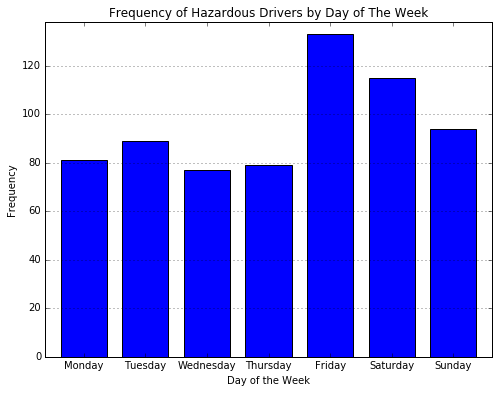

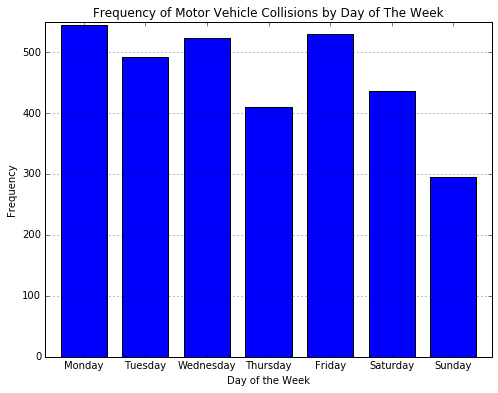

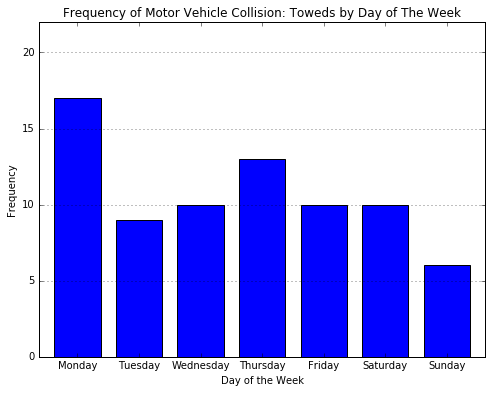

In [3]:
'''Traffic Incident frequency by day of the week'''
mapping_day = {
        '0':'Monday',
        '1':'Tuesday',
        '2':'Wednesday',
        '3':'Thursday',
        '4':'Friday',
        '5':'Saturday',
        '6':'Sunday'
}

mapping_type = {'HAZARDOUS DRIVER':'Hazardous Driver', 
                'STALLED/HAZARDOUS VEHICLE':'Stalled or Hazardous Vehicle', 
                'TRAFFIC INCIDENT - NO COLLISION':'Traffic Incident with No Collision', 
                'TRAFFIC NUISANCE OR PARKING VIOLATION':'Traffic Nuisance or Parking Violation', 
                'MOTOR VEHICLE COLLISION':'Motor Vehicle Collision', 
                'TRAFFIC SIGNAL PROBLEM':'Traffic Signaling Issue', 
                'MOTOR VEHICLE COLLISION - TOWED':'Motor Vehicle Collision: Towed'}
collisionTypes = df[['type','latitude','longitude','hour','dayofweek', 'dayofweek_name','day','count']].groupby(['type','dayofweek']).count()
collisionTypes
for t in mapping_type:
    ax = collisionTypes.loc[t][['count']].plot.bar(title = 'Frequency of ' + mapping_type[t] + 's by Day of The Week', legend = False, rot = 0, figsize=(8,6), width=0.75)
    days = [item.get_text() for item in ax.get_xticklabels()]
    labels = [mapping_day[day] for day in days]
    ax.set_xticklabels(labels)
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Frequency')
    ax.set_ylim(None, max(collisionTypes.loc[t][['count']].values) + 5)
    ax.yaxis.grid(True)
    fig = ax.get_figure()
    fig.savefig('graphs/dayofweek_' + mapping_type[t].replace(' ','') +'.png')

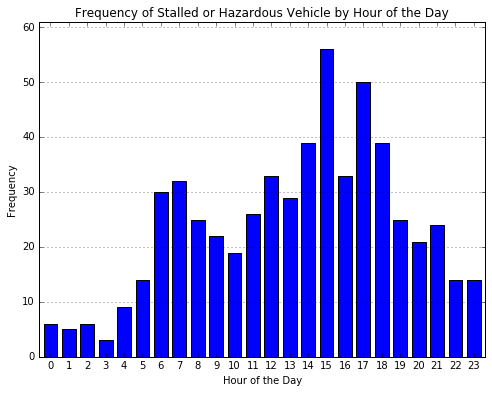

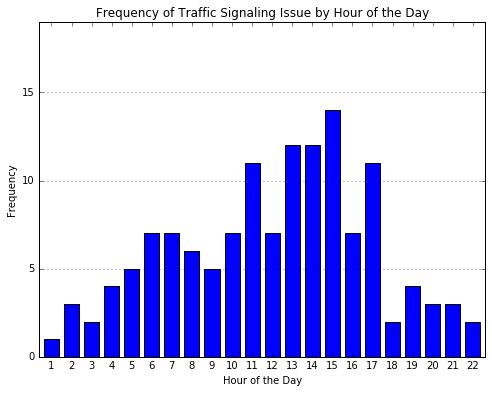

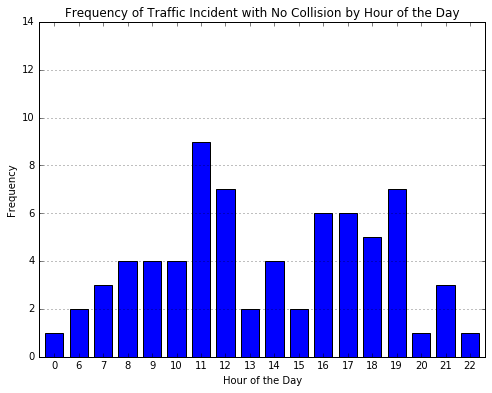

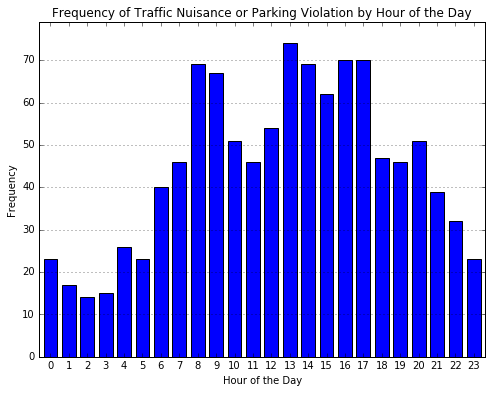

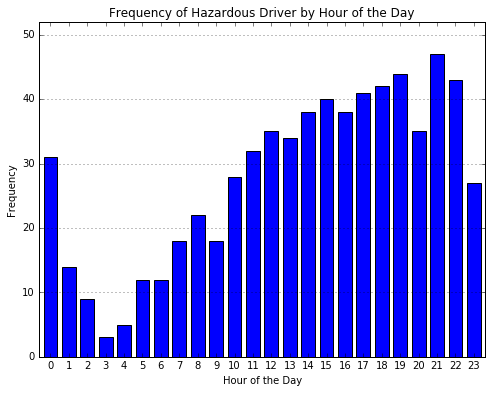

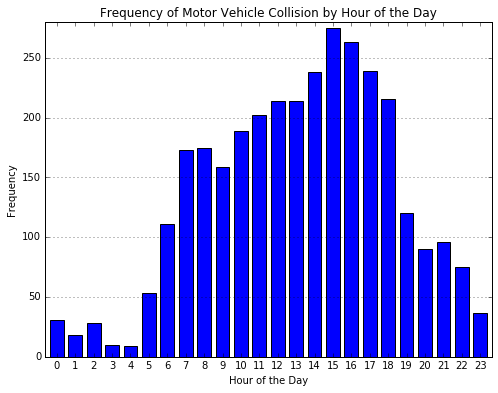

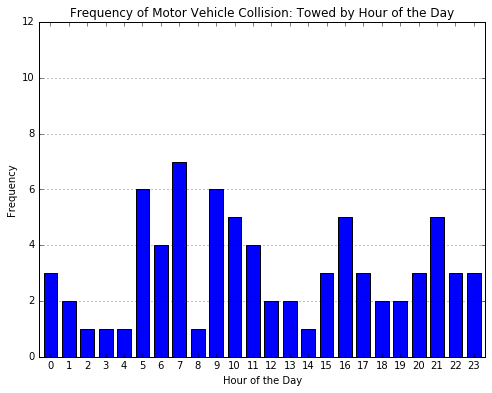

In [4]:
'''Traffic incident frequency by hour of the day'''
collisionTypes = df[['type','latitude','longitude','hour','dayofweek', 'dayofweek_name','day','count']].groupby(['type','hour']).count()
collisionTypes
for t in mapping_type:
    ax = collisionTypes.loc[t][['count']].plot.bar(title = 'Frequency of ' + mapping_type[t] + ' by Hour of the Day', legend = False, rot = 0, figsize=(8,6), width=0.75)
    days = [item.get_text() for item in ax.get_xticklabels()]
#     labels = [mapping_day[day] for day in days]
#     ax.set_xticklabels(labels)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Frequency')
    ax.set_ylim(None, max(collisionTypes.loc[t][['count']].values) + 5)
    ax.yaxis.grid(True)
    fig = ax.get_figure()
    fig.savefig('graphs/hourofday_' + mapping_type[t].replace(' ','') +'.png')

# Creating a heat map
### Follow this [link](http://jupyter-gmaps.readthedocs.io/en/latest/) for using module gmap

In [8]:
'''Generate list of latitude and logitude data'''
# df.index.get_level_values(0).get_duplicates() # Finding duplicate rows 
temp = df.reset_index().drop_duplicates(subset='index',keep='last').set_index('index')
lat_dict = temp.latitude.to_dict()
lon_dict = temp.longitude.to_dict()
keys = lat_dict.keys()
lat_list = []
lon_list = []
for key in keys:
    lat_list.append(lat_dict[key])
    lon_list.append(lon_dict[key])

In [9]:
'''One library that creates renders a map in an HTML file #not using'''
# gmap = gmplot.GoogleMapPlotter(21.45, -157.97, 11)
# gmap.scatter(lat_list, lon_list)
# gmap.heatmap(lat_list, lon_list)

'One library that creates renders a map in an HTML file #not using'

In [10]:
'''Generate latitude and longitude data as tuples in a list'''
data = [(lat_dict[key], lon_dict[key]) for key in lat_dict if not np.isnan(lat_dict[key]) ]

In [11]:
# Use your own api key
gmaps.configure(api_key='')

In [12]:
m = gmaps.Map()
heatmap_layer = gmaps.Heatmap(data = data)
heatmap_layer.max_intensity = 100 
heatmap_layer.point_radius = 10
heatmap_layer.opacity = 1

m.add_layer(heatmap_layer)
m

In [222]:
import folium 
from folium import plugins

heatmap = folium.Map(location=[21.45, -157.97], zoom_start=11)
heatmap.add_children(plugins.HeatMap([[coord[0],coord[1]] for coord in data]))
heatmap.
heatmap.save('heatmap.html')